In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
train = pd.read_csv('train_tweet.csv')
test = pd.read_csv('test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
# Adding length of the tweet column
train['length'] = train['tweet'].str.len()
test['length'] = test['tweet'].str.len()

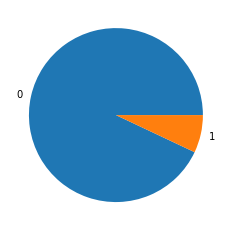

In [20]:
plt.pie(train['label'].value_counts(), labels=(0,1))
plt.show()

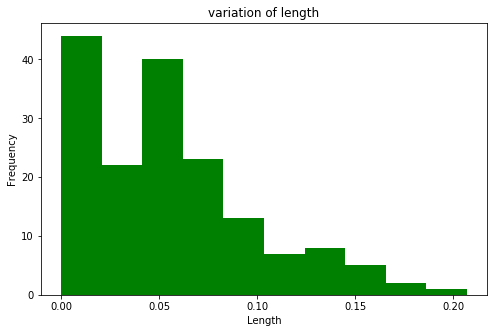

In [21]:
train.groupby('length').mean()['label'].plot.hist(color = 'green', figsize = (8, 5))
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(train.tweet)
sum_words = words.sum(axis=0)

In [28]:
words_freq = [(word, sum_words[0,i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['words', 'freq'])
frequency.head()

,words,freq
0,user,17577
1,love,2749
2,day,2311
3,amp,1776
4,happy,1686


Text(0.5, 1.0, 'Vocabulary - WordCloud')

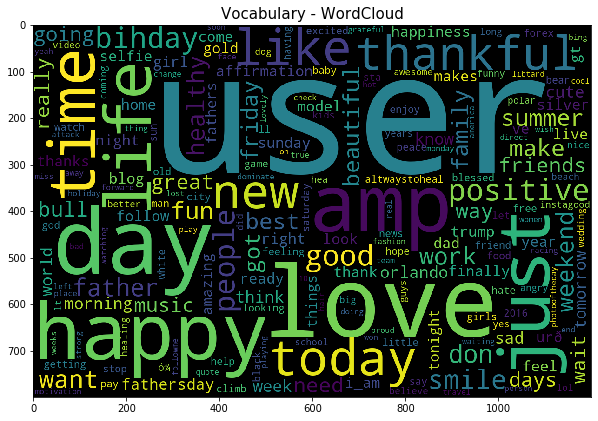

In [30]:
from wordcloud import WordCloud

wc = WordCloud(background_color='black', width = 1200, height=800).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.title("Vocabulary - WordCloud", fontsize=15)

In [33]:
import re
def hashtag_extract(x):
    hashtags=[]
    
    for i in x:
        h = re.findall(r"#(\w+)", i)
        hashtags.append(h)
        
    return hashtags

In [41]:
# hashtags from regular tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# hashtags from negative tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [42]:
HT_regular

['run',
 'lyft',
 'disapointed',
 'getthanked',
 'model',
 'motivation',
 'allshowandnogo',
 'school',
 'exams',
 'hate',
 'imagine',
 'actorslife',
 'revolutionschool',
 'girl',
 'allin',
 'cavs',
 'champions',
 'cleveland',
 'clevelandcavaliers',
 'gr8',
 'ireland',
 'blog',
 'silver',
 'gold',
 'forex',
 'orlando',
 'standwithorlando',
 'pulseshooting',
 'orlandoshooting',
 'biggerproblems',
 'selfish',
 'heabreaking',
 'values',
 'love',
 '80days',
 'gettingfed',
 'got7',
 'junior',
 'yugyoem',
 'omg',
 'thankful',
 'positive',
 'friday',
 'cookies',
 'euro2016',
 'badday',
 'coneofshame',
 'cats',
 'pissed',
 'funny',
 'laughs',
 'wine',
 'weekend',
 'tgif',
 'ff',
 'gamedev',
 'indiedev',
 'indiegamedev',
 'squad',
 'upsideofflorida',
 'shopalyssas',
 'love',
 'smiles',
 'media',
 'pressconference',
 'antalya',
 'turkey',
 'throwback',
 'ica16',
 'rip',
 'orlando',
 'alohafriday',
 'time',
 'not',
 'exist',
 'positivevibes',
 'hawaiian',
 'goodnight',
 'badmonday',
 'taylorswift1

In [44]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                 'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 

In [46]:
# Top 20 positive hashtags
d

,Hashtag,Count
33,love,1531
41,positive,874
163,healthy,570
212,smile,548
40,thankful,491
183,fun,434
403,life,405
223,summer,367
4,model,364
96,affirmation,363


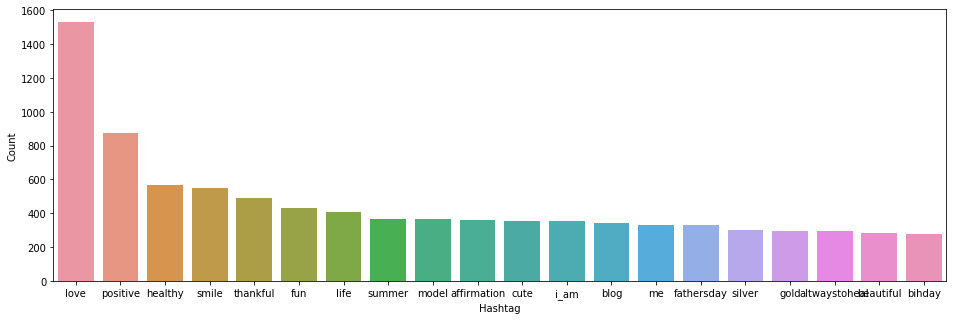

In [47]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [49]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
d

,Hashtag,Count
22,trump,133
31,politics,94
67,allahsoil,92
28,libtard,76
30,liberal,75
29,sjw,74
64,retweet,57
63,black,44
66,miamiâ,38
33,hate,32


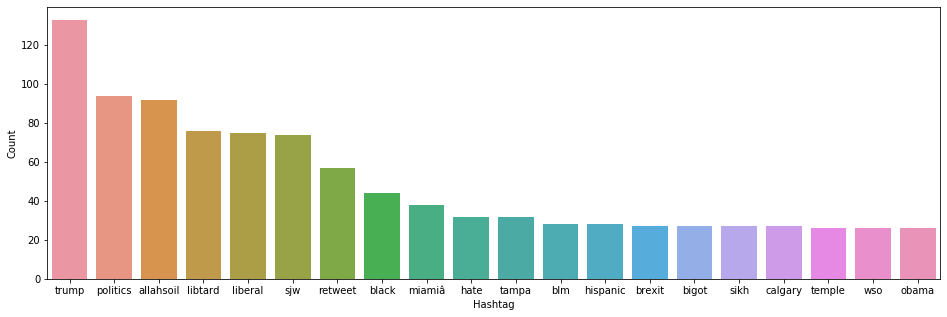

In [50]:
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [52]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split())

tokenized_tweet

0        [@user, when, a, father, is, dysfunctional, an...
1        [@user, @user, thanks, for, #lyft, credit, i, ...
2                                  [bihday, your, majesty]
3        [#model, i, love, u, take, with, u, all, the, ...
4                 [factsguide:, society, now, #motivation]
                               ...                        
31957    [ate, @user, isz, that, youuu?ðððð...
31958    [to, see, nina, turner, on, the, airwaves, try...
31959    [listening, to, sad, songs, on, a, monday, mor...
31960    [@user, #sikh, #temple, vandalised, in, in, #c...
31961                [thank, you, @user, for, you, follow]
Name: tweet, Length: 31962, dtype: object

In [53]:
import gensim

model_w2v = gensim.models.Word2Vec(
            tokenized_tweet, size=200, window=5, min_count=2,
            sg=1, hs=0, negative=10, workers=2, seed=34)

model_w2v.train(tokenized_tweet, total_examples=len(train['tweet']), epochs=20)

(6109793, 8411580)

In [55]:
model_w2v.wv.most_similar(positive="love")

[('ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 0.45026126503944397),
 ('ð\x9f\x98¹ð\x9f\x98¹ð\x9f\x98¹ð\x9f\x98¹ð\x9f\x98»ð\x9f\x98»',
  0.4446457028388977),
 ('ooh', 0.4334576427936554),
 ('granted.', 0.41969889402389526),
 ('happened,', 0.41429275274276733),
 ('#smile#love', 0.4131894111633301),
 ('#mommy', 0.412920206785202),
 ('much!!', 0.4127171039581299),
 ('human!', 0.40914857387542725),
 ('dresser', 0.4064778685569763)]

In [57]:
model_w2v.wv.most_similar(positive="apple")

[('mytraining', 0.7136616706848145),
 ('"mytraining"', 0.7118372917175293),
 ('training"', 0.6921132206916809),
 ('app,', 0.6490980386734009),
 ('app', 0.6181423664093018),
 ('"my', 0.6111081838607788),
 ('ta', 0.6068024635314941),
 ('heroku', 0.5765635371208191),
 ('bees', 0.5759133696556091),
 ('humans.', 0.5720339417457581)]

In [59]:
model_w2v.wv.most_similar(negative="hate")

[('#apple', -0.03126363083720207),
 ('#games', -0.03882383555173874),
 ('stas', -0.04591481760144234),
 ('eyes', -0.0490819588303566),
 ('#yay', -0.05131535977125168),
 ('you?', -0.05633433163166046),
 ('season', -0.0569833479821682),
 ('â\x80¦', -0.05788741633296013),
 ('#hype', -0.06200997158885002),
 ('#fundraising', -0.07062147557735443)]

In [60]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\Users\RAVI\Anaconda3\lib\site-packages\tqdm\std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [61]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

C:\Users\RAVI\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  after removing the cwd from sys.path.


[LabeledSentence(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 LabeledSentence(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 LabeledSentence(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 LabeledSentence(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 LabeledSentence(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 LabeledSentence(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandn

In [65]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

train_corpus = []
for i in range(0, 31962):
    review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i]).lower().split()
    ps = PorterStemmer()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    
    review = ' '.join(review)
    train_corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [66]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [67]:
cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [68]:
cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [70]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [71]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.951820798398198
F1 score : 0.6099290780141844
[[7305  127]
 [ 258  301]]


In [73]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9991656585040257
Validation Accuracy : 0.9326742585408585
f1 score : 0.5417376490630323
[[7135  297]
 [ 241  318]]


In [74]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

Training Accuracy : 0.9603687789412206
Validation Accuracy : 0.9555750218996371
f1 score : 0.5748502994011976
[[7396   36]
 [ 319  240]]
